Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPool2D, Conv2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
import seaborn as sns

In [4]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [5]:
%%time
!unzip '/content/gdrive/MyDrive/CNN_Assignment_CaseStudy/CNN_assignment.zip' -d './'

Archive:  /content/gdrive/MyDrive/CNN_Assignment_CaseStudy/CNN_assignment.zip
  inflating: ./Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: ./Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: ./Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: ./Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: ./Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: ./Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: ./Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: ./Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [6]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("./Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('./Skin cancer ISIC The International Skin Imaging Collaboration/Test')

### Now we will see the numbers of images present in the train and the test folders.

In [7]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print('The number of train images are:')
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print('The number of test images are:')
print(image_count_test)

The number of train images are:
2239
The number of test images are:
118


In [8]:
data_dir_train

PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train')

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [9]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [10]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, seed=123, validation_split = 0.2, subset = 'training', image_size=(img_height, img_width),\
                                                               batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [11]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, seed=123, validation_split = 0.2, subset = 'validation', image_size=(img_height, img_width),\
                                                               batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [12]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## Visualize the different types of classes present in the dataset.
#### We will visualize first directly from the preprocesses train dataset. Also we will visualize directly from the path of the train dataset

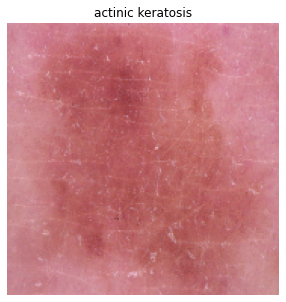

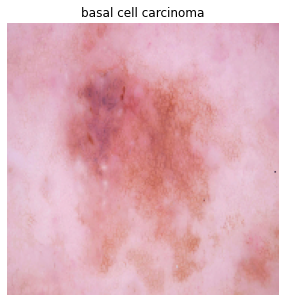

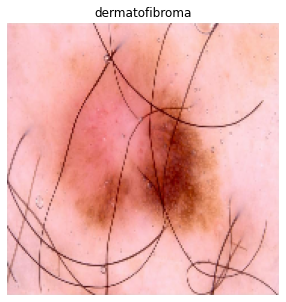

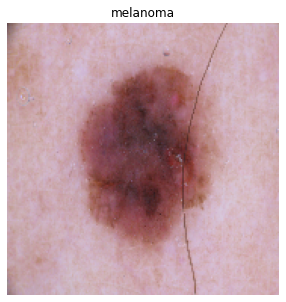

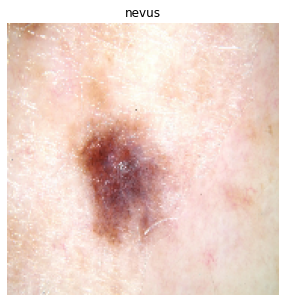

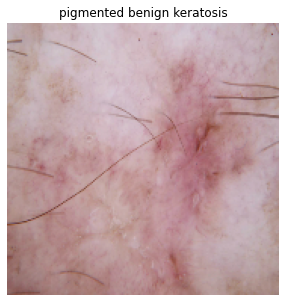

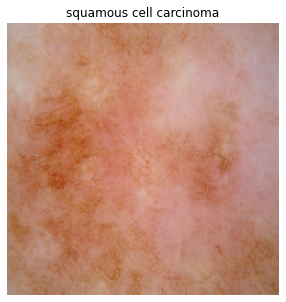

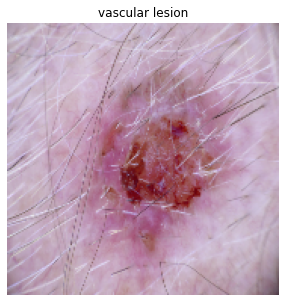

In [13]:
import matplotlib.pyplot as plt
dictionary_images = {}
for images, labels in train_ds.take(1):
    image_index=0
    for l in sorted(labels):
      dictionary_images[int(l)]=images[image_index].numpy().astype("uint8")
      image_index+=1
for i in dictionary_images.keys():
      plt.figure(figsize=(5, 5))
      plt.imshow(dictionary_images[i])
      plt.title(class_names[i])
      plt.axis("off")
      plt.show()

### Now we will pass the batch of the image through ImageDataGenerator

In [14]:
image_generator = keras.preprocessing.image.ImageDataGenerator(validation_split=0.2)
train_data_gen = image_generator.flow_from_directory(directory=data_dir_train,
                                                     subset='training',
                                                     batch_size=batch_size,
                                                     shuffle=True,
                                                     target_size=(img_height, img_width),
                                                     classes = list(class_names))
val_data_gen = image_generator.flow_from_directory(directory=data_dir_train,
                                                     subset='validation',
                                                     batch_size=batch_size,
                                                     shuffle=True,
                                                     target_size=(img_height, img_width),
                                                     classes = list(class_names))

Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

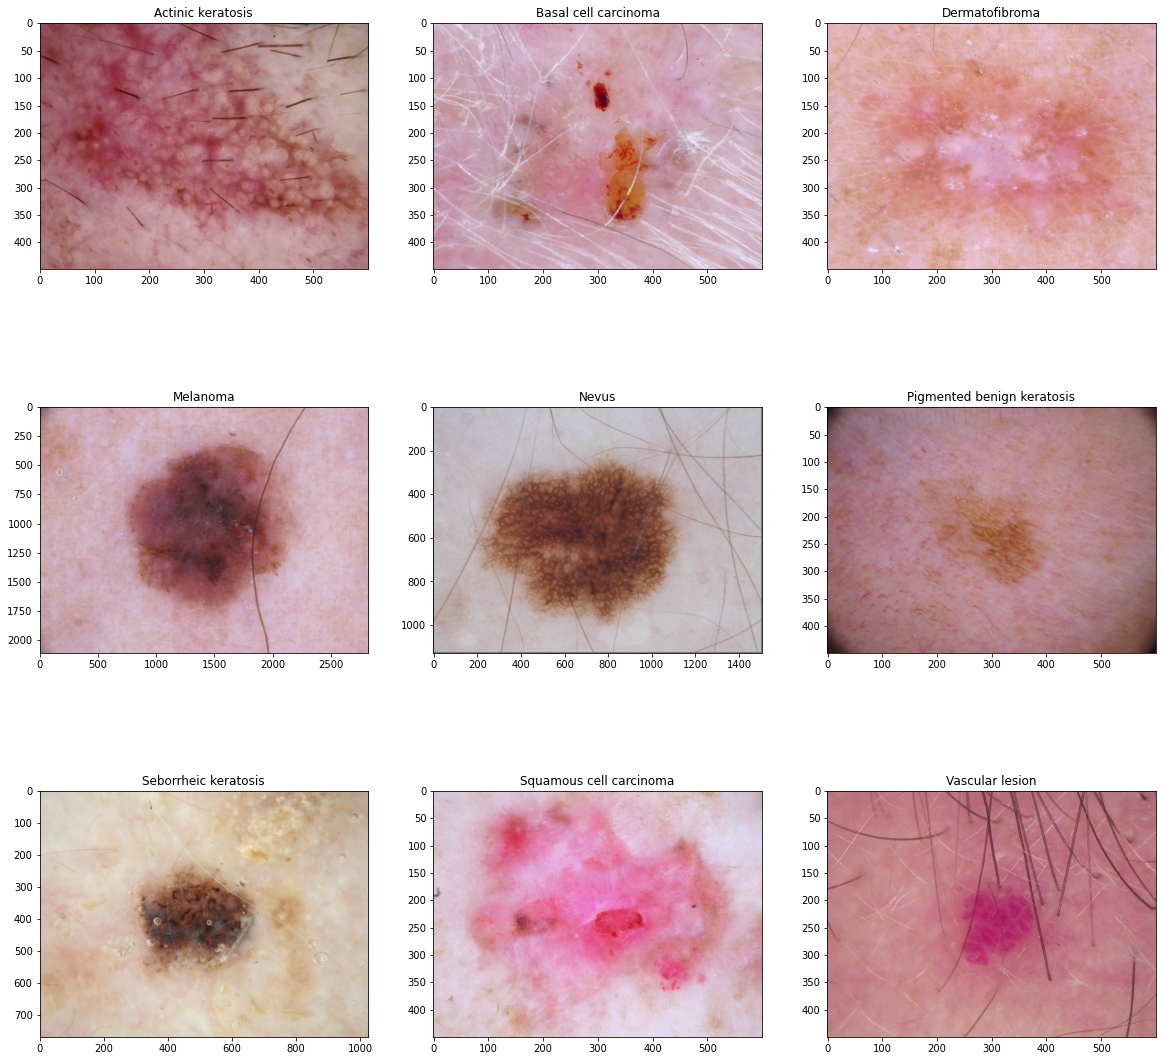

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
### your code goes here, you can use training or validation data to visualize
n=0
plt.figure(figsize=(20,20))
for classes in sorted(os.listdir(data_dir_train)):
  ax = plt.subplot(3,3,n+1)
  img = mpimg.imread('Skin cancer ISIC The International Skin Imaging Collaboration/Train/'+classes+'/'+sorted(os.listdir('Skin cancer ISIC The International Skin Imaging Collaboration/Train/'+classes))[0])
  plt.imshow(img)
  plt.title(classes[0].upper()+classes[1:])
  n+=1

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [16]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [17]:
n_classes = len(class_names)

In [18]:
input_layer = Input(shape=(180,180,3), name='Input_Layer')
scaling_layer = layers.experimental.preprocessing.Rescaling(1.0 / 255)(input_layer)
Conv_1 = Conv2D(64, kernel_size=3, activation='relu', name='Convolution_Layer_1')(scaling_layer)
Maxpool_1 = MaxPool2D((2, 2), name='Maxpooling_Layer_1')(Conv_1)
Conv_2 = Conv2D(32, kernel_size=3, activation='relu', name='Convolution_Layer_2')(Maxpool_1)
Maxpool_2 = MaxPool2D((2, 2),name='Maxpooling_Layer_2')(Conv_2)
Conv_3 = Conv2D(16, kernel_size=3, activation='relu', name='Convolution_Layer_3')(Maxpool_2)
Maxpool_3 = MaxPool2D((2, 2),name='Maxpooling_Layer_3')(Conv_3)
Flatten_1 = Flatten(name='Flatten_Layer')(Maxpool_3)
FC_1 = Dense(100, activation='relu', kernel_initializer='he_uniform', name='Fully_Connected_Layer_1')(Flatten_1)
output = Dense(n_classes, activation='softmax',name='Output_Layer')(FC_1)
model = Model(inputs=input_layer,outputs=output)

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [19]:
# ### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (InputLayer)     [(None, 180, 180, 3)]     0         
_________________________________________________________________
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
Convolution_Layer_1 (Conv2D) (None, 178, 178, 64)      1792      
_________________________________________________________________
Maxpooling_Layer_1 (MaxPooli (None, 89, 89, 64)        0         
_________________________________________________________________
Convolution_Layer_2 (Conv2D) (None, 87, 87, 32)        18464     
_________________________________________________________________
Maxpooling_Layer_2 (MaxPooli (None, 43, 43, 32)        0         
_________________________________________________________________
Convolution_Layer_3 (Conv2D) (None, 41, 41, 16)        4624  

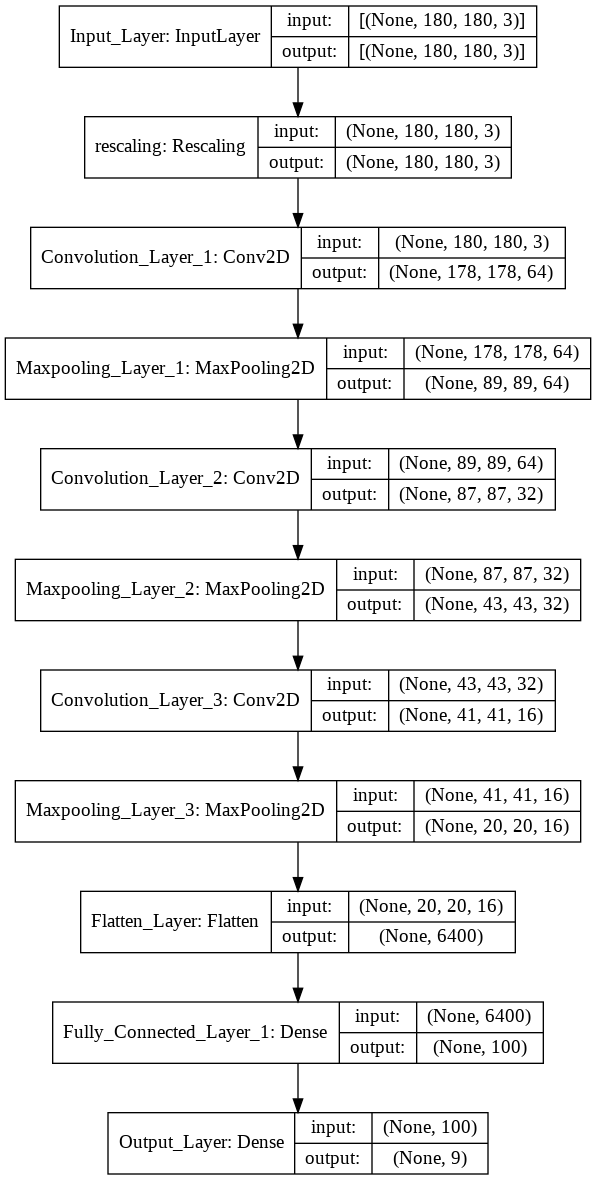

In [21]:
tf.keras.utils.plot_model(
    model, to_file='model_1.png', show_shapes=True, show_layer_names=True,
    rankdir='TB')

### Train the model

In [104]:
epochs = 20
history = model.fit(
  train_data_gen,
  validation_data=val_data_gen,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 33s 566ms/step - loss: 2.1137 - accuracy: 0.1835 - val_loss: 2.0127 - val_accuracy: 0.1959
Epoch 2/20
57/57 [==============================] - 31s 552ms/step - loss: 2.0510 - accuracy: 0.1820 - val_loss: 2.0147 - val_accuracy: 0.2162
Epoch 3/20
57/57 [==============================] - 32s 554ms/step - loss: 1.9958 - accuracy: 0.2252 - val_loss: 1.9992 - val_accuracy: 0.2838
Epoch 4/20
57/57 [==============================] - 31s 553ms/step - loss: 2.0142 - accuracy: 0.2301 - val_loss: 1.8734 - val_accuracy: 0.2050
Epoch 5/20
57/57 [==============================] - 31s 550ms/step - loss: 1.8193 - accuracy: 0.3126 - val_loss: 1.6947 - val_accuracy: 0.4505
Epoch 6/20
57/57 [==============================] - 31s 552ms/step - loss: 1.6121 - accuracy: 0.4272 - val_loss: 1.8469 - val_accuracy: 0.3986
Epoch 7/20
57/57 [==============================] - 31s 551ms/step - loss: 1.3839 - accuracy: 0.5194 - val_loss: 1.8510 - val_accuracy: 0.4144

### Visualizing training results

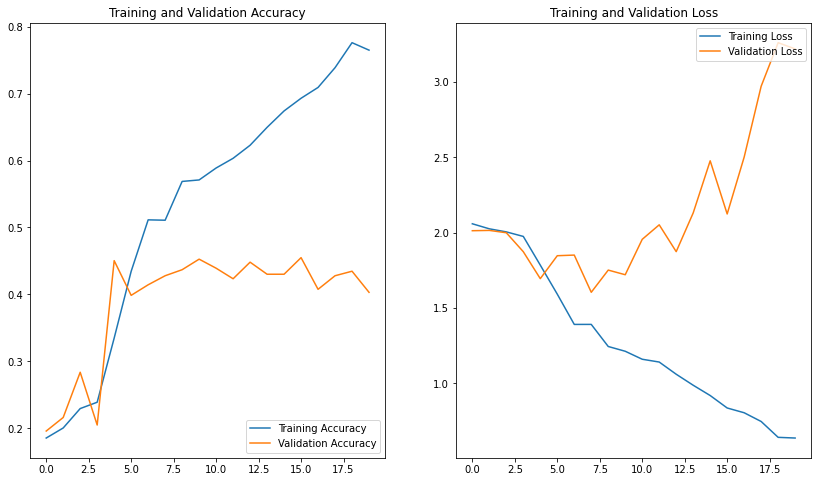

In [105]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

## **Understandings on the model fit:**
From the model results and the train and test graphs above we could clearly see that after training the model for ~20 epochs the training accuracy is **76.35%** and the validation accuracy is **40.32%**. There is ~**36%** of difference between the train and the test accuracy. Thus it is evident that the model is overfitting.

### Now the next step will be perform data augmentation startegy such as RandomFlip, RandomRotation and RamdomZoom and then visualize one instance of the image.

In [23]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomCrop, RandomZoom
data_augmentation = keras.Sequential(
    [
        RandomFlip("horizontal"),
        RandomRotation(0.1),
        RandomZoom(0.1)
    ]
)

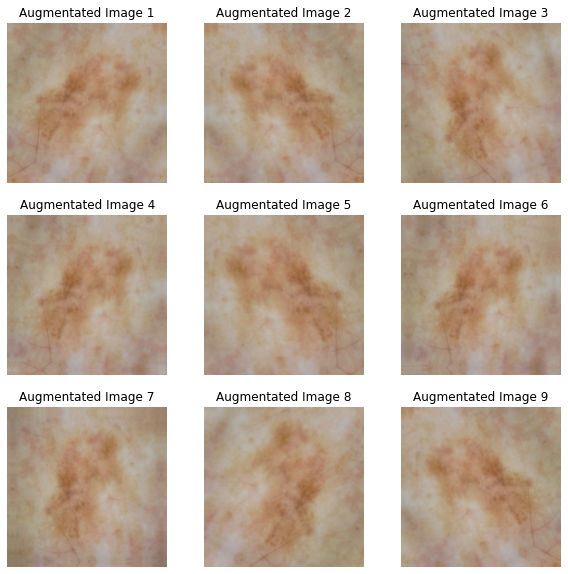

In [27]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[1].numpy().astype("uint8"))
        plt.title('Augmentated Image '+str(i+1))
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


### As instructed we will now create, compile and train the model based on the transformed dataset using the data augmented technique and then evaluate whether there is any improvement on the model overfitting

In [28]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
## Your code goes here
input_layer_augmented = Input(shape=(180,180,3),name='Input Layer Augmented')
x_augmented = data_augmentation(input_layer_augmented)
scaling_layer_augmented = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x_augmented)
Conv_1_augmented = Conv2D(64, kernel_size=3, activation='relu',name='Convolution_Layer_1_Augmented')(scaling_layer_augmented)
Dropout_1 = Dropout(0.2, name='Dropout_Layer_1')(Conv_1_augmented)
Maxpool_1_augmented = MaxPool2D((2, 2),name='Maxpool_Layer_1')(Dropout_1)
Conv_2_augmented = Conv2D(32, kernel_size=3, activation='relu',name='Convolution_Layer_2_Augmented')(Maxpool_1_augmented)
Dropout_2 = Dropout(0.2,name='Dropout_Layer_2')(Conv_2_augmented)
Maxpool_2_augmented = MaxPool2D((2, 2),name='Maxpool_Layer_2')(Dropout_2)
Conv_3_augmented = Conv2D(32, kernel_size=3, activation='relu',name='Convolution_Layer_3_Augmented')(Maxpool_2_augmented)
Dropout_3 = Dropout(0.2,name='Dropout_Layer_3')(Conv_3_augmented)
Maxpool_3_augmented = MaxPool2D((2, 2),name='Maxpool_Layer_3')(Dropout_3)
Flatten_1_augmeneted = Flatten(name='Flatten_Layer')(Maxpool_3_augmented)
FC_1_augmeneted = Dense(100, activation='relu', kernel_initializer='he_uniform',name='Fully_Connected_Layer_1')(Flatten_1_augmeneted)
output_augmented = Dense(n_classes, activation='softmax')(FC_1_augmeneted)
model_augmented = Model(inputs=input_layer_augmented,outputs=output_augmented)

### Compiling the model

In [29]:
## Your code goes here
model_augmented.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
model_augmented.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input Layer Augmented (Input [(None, 180, 180, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
Convolution_Layer_1_Augmente (None, 178, 178, 64)      1792      
_________________________________________________________________
Dropout_Layer_1 (Dropout)    (None, 178, 178, 64)      0         
_________________________________________________________________
Maxpool_Layer_1 (MaxPooling2 (None, 89, 89, 64)        0         
_________________________________________________________________
Convolution_Layer_2_Augmente (None, 87, 87, 32)        1846

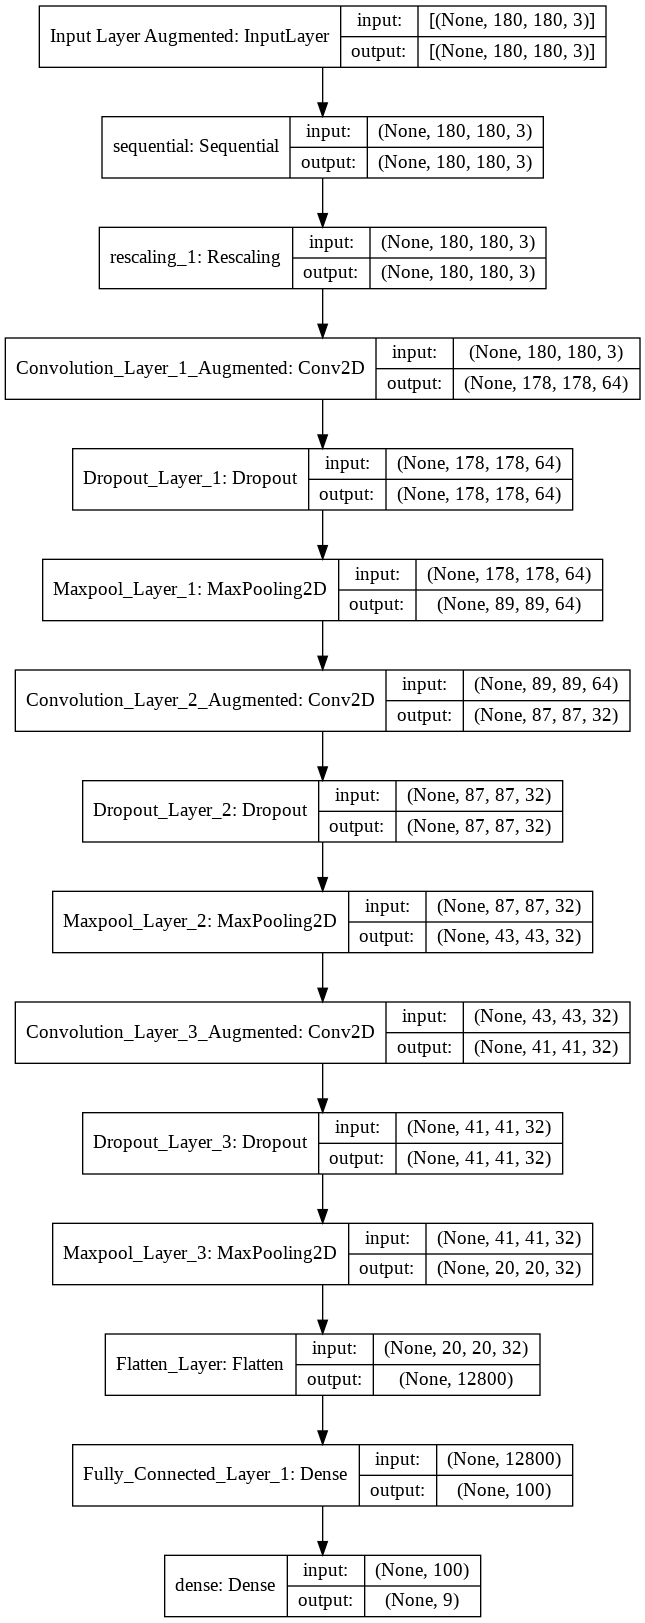

In [32]:
tf.keras.utils.plot_model(
    model_augmented, to_file='model_2.png', show_shapes=True, show_layer_names=True,
    rankdir='TB')

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history_augmented = model_augmented.fit(
  train_data_gen,
  validation_data=val_data_gen,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 33s 575ms/step - loss: 2.0877 - accuracy: 0.1951 - val_loss: 2.0984 - val_accuracy: 0.2005
Epoch 2/20
57/57 [==============================] - 32s 565ms/step - loss: 1.8936 - accuracy: 0.3094 - val_loss: 1.8638 - val_accuracy: 0.3468
Epoch 3/20
57/57 [==============================] - 32s 563ms/step - loss: 1.5976 - accuracy: 0.4172 - val_loss: 1.7917 - val_accuracy: 0.4212
Epoch 4/20
57/57 [==============================] - 32s 564ms/step - loss: 1.5466 - accuracy: 0.4586 - val_loss: 1.8802 - val_accuracy: 0.3446
Epoch 5/20
57/57 [==============================] - 32s 560ms/step - loss: 1.5846 - accuracy: 0.4589 - val_loss: 1.7441 - val_accuracy: 0.3806
Epoch 6/20
57/57 [==============================] - 32s 558ms/step - loss: 1.4217 - accuracy: 0.5188 - val_loss: 1.7350 - val_accuracy: 0.4009
Epoch 7/20
57/57 [==============================] - 32s 565ms/step - loss: 1.4646 - accuracy: 0.4618 - val_loss: 1.6960 - val_accuracy: 0.4572

### Visualizing the results

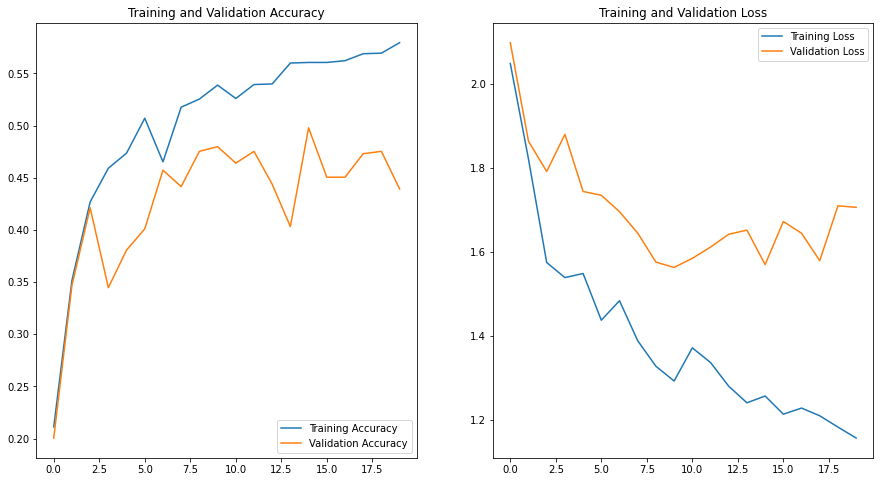

In [ ]:
acc = history_augmented.history['accuracy']
val_acc = history_augmented.history['val_accuracy']

loss = history_augmented.history['loss']
val_loss = history_augmented.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

## **Understandings on the model fit:**
From the model results and the train and test graphs above we could see that after training the model for approx 20 epochs the training accuracy is **59.21%** and the validation accuracy is **43.92%**. The difference between the train accuracy and test accuracy is **~16%**, which is quite low as compared to the vanilla model training where we had a difference of **~37%**. So we were able to reduce the overfitting of the model using the **augmentation strategy**

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [33]:
## Your code goes here.
lst_allclasses = pd.Series([str(i).split("/")[-2] for i in list(data_dir_train.glob('*/*.jpg'))])

In [34]:
print('The distribution of the class in terms of the values are:')
count_of_classes = lst_allclasses.value_counts().sort_values()
count_of_classes

The distribution of the class in terms of the values are:


seborrheic keratosis           77
dermatofibroma                 95
actinic keratosis             114
vascular lesion               139
squamous cell carcinoma       181
nevus                         357
basal cell carcinoma          376
melanoma                      438
pigmented benign keratosis    462
dtype: int64

In [35]:
distribution_of_classes = lst_allclasses.value_counts().sort_values()*100/sum(list(lst_allclasses.value_counts().values))

In [36]:
print('The distribution of the class in terms of the percentage are:')
distribution_of_classes

The distribution of the class in terms of the percentage are:


seborrheic keratosis           3.439035
dermatofibroma                 4.242966
actinic keratosis              5.091559
vascular lesion                6.208129
squamous cell carcinoma        8.083966
nevus                         15.944618
basal cell carcinoma          16.793211
melanoma                      19.562305
pigmented benign keratosis    20.634212
dtype: float64

In [37]:
class_dist = pd.DataFrame()
class_dist['Class']=distribution_of_classes.index
class_dist['Distribution (in %)']=distribution_of_classes.values
class_dist

Class  Distribution (in %)
0        seborrheic keratosis             3.439035
1              dermatofibroma             4.242966
2           actinic keratosis             5.091559
3             vascular lesion             6.208129
4     squamous cell carcinoma             8.083966
5                       nevus            15.944618
6        basal cell carcinoma            16.793211
7                    melanoma            19.562305
8  pigmented benign keratosis            20.634212

In [38]:
class_count_df = pd.DataFrame()
class_count_df['Class']=count_of_classes.index
class_count_df['Count']=count_of_classes.values
class_count_df

Class  Count
0        seborrheic keratosis     77
1              dermatofibroma     95
2           actinic keratosis    114
3             vascular lesion    139
4     squamous cell carcinoma    181
5                       nevus    357
6        basal cell carcinoma    376
7                    melanoma    438
8  pigmented benign keratosis    462

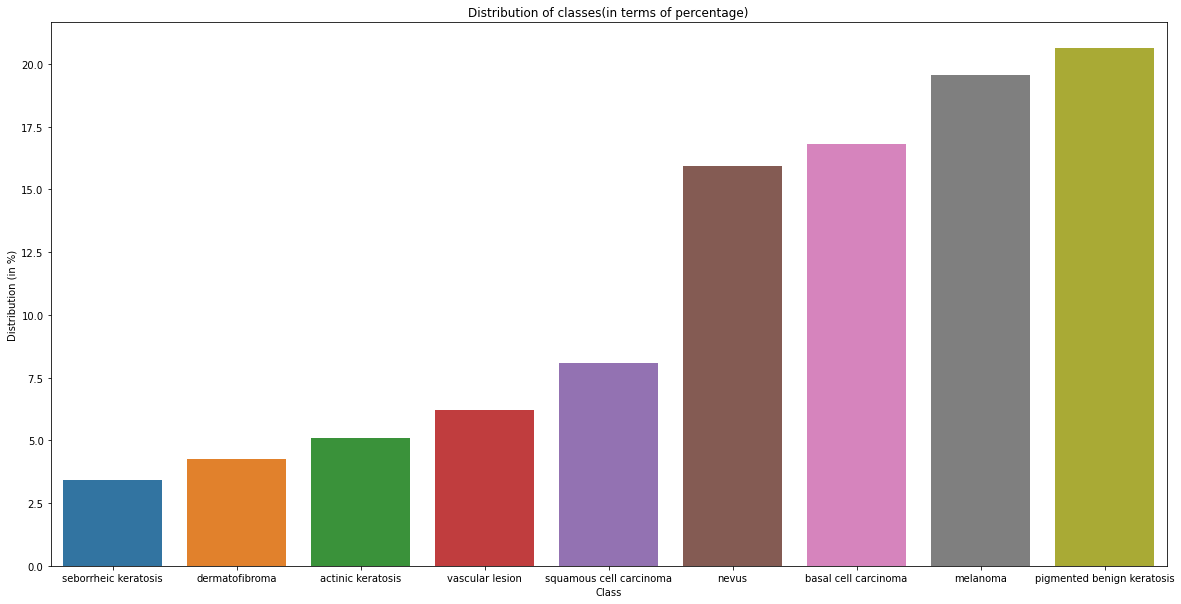

In [39]:
plt.figure(figsize=(20,10))
sns.barplot(data=class_dist,x='Class',y='Distribution (in %)')
plt.title('Distribution of classes(in terms of percentage)')
plt.show()

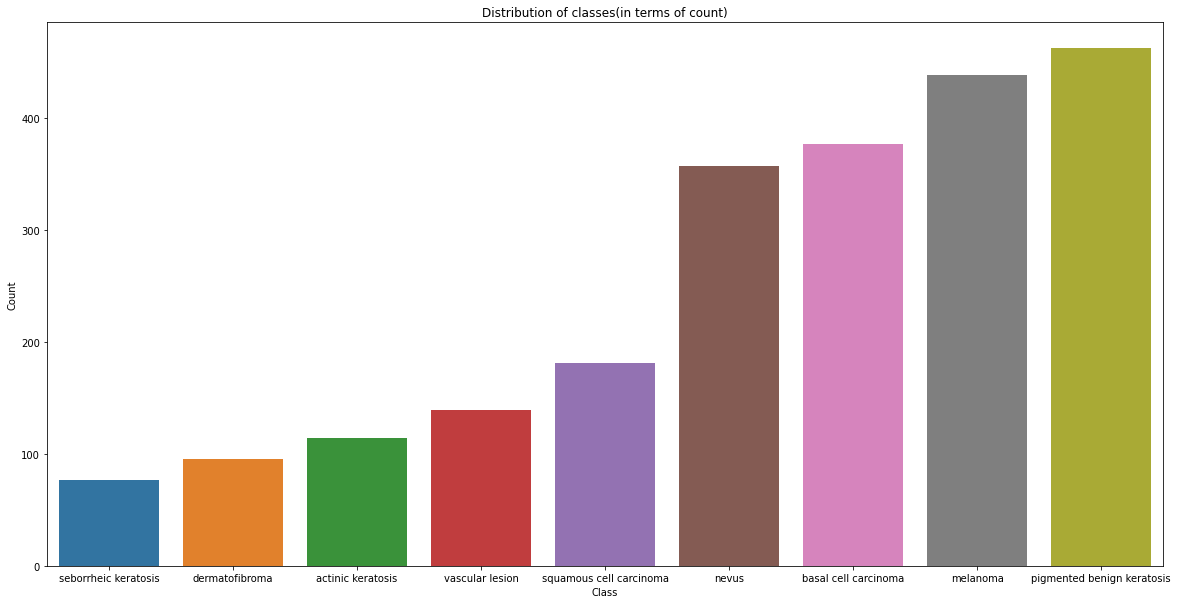

In [40]:
plt.figure(figsize=(20,10))
sns.barplot(data=class_count_df,x='Class',y='Count')
plt.title('Distribution of classes(in terms of count)')
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


### From the above analysis on the classes of the dataset below are the findings:
a) The class that have least number of samples is **seborrheic keratosis** which have **77 training samples(~3.44% of the total training samples).**
b) The class that dominate the data in terms of proportionate number of samples is **pigmented benign keratosis** which have **462 training samples(~20.63% of the total training samples).**

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [41]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [42]:
path_to_training_dataset="./Skin cancer ISIC The International Skin Imaging Collaboration/Train/" #"To do"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FF894162750>: 100%|██████████| 500/500 [00:15<00:00, 33.01 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FF8E02413D0>:   0%|          | 1/500 [00:00<01:07,  7.36 Samples/s]

Initialised with 376 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF8803E3C50>: 100%|██████████| 500/500 [00:15<00:00, 31.48 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FF894207510>:   0%|          | 1/500 [00:00<00:50,  9.89 Samples/s]

Initialised with 95 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF89407F550>: 100%|██████████| 500/500 [00:15<00:00, 31.64 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3008x2000 at 0x7FF89412ABD0>: 100%|██████████| 500/500 [01:18<00:00,  6.38 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7FF8E0486850>: 100%|██████████| 500/500 [01:21<00:00,  6.13 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FF88079C1D0>:   0%|          | 1/500 [00:00<00:59,  8.32 Samples/s]

Initialised with 462 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FF8E033A8D0>: 100%|██████████| 500/500 [00:15<00:00, 31.57 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FF8941CAF50>: 100%|██████████| 500/500 [00:39<00:00, 12.67 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF880745210>: 100%|██████████| 500/500 [00:15<00:00, 31.57 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FF894197750>:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF88028B410>: 100%|██████████| 500/500 [00:16<00:00, 31.10 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [43]:
import glob

In [44]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

First we will create a list with the path of the images present in the original train dataset. Then we will get the class of the each images and then create a dataframe.
Similarly we will create another dataframe containing the path and the class as columns. Then we will append the two dataframe and then analyse the distribution of the new dataset

In [45]:
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*', '*.jpg'))]
print(path_list)
len(path_list)

['Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/ISIC_0000545.jpg', 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/ISIC_0026857.jpg', 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/ISIC_0000067.jpg', 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/ISIC_0029141.jpg', 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/ISIC_0000042.jpg', 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/ISIC_0000230.jpg', 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/ISIC_0000422.jpg', 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/ISIC_0000062.jpg', 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/ISIC_0027896.jpg', 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/ISIC_0000497.jpg', 'Skin cancer ISIC The International Skin Imaging Collaborat

2239

In [46]:
new_path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
print(new_path_list)
len(new_path_list)

['Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000319.jpg_8aada996-f200-47fb-ad34-71190ff5f071.jpg', 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000483.jpg_e45c7fac-eb6f-432e-9a23-ff7bd2802c4f.jpg', 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000024.jpg_7d79c3f0-62b7-4bff-8e71-22721a18ecd5.jpg', 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0026765.jpg_4b213269-9753-496b-b46c-cc4fba168156.jpg', 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0028517.jpg_11362d1a-e55a-4442-8986-7aa22eea98ab.jpg', 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000515.jpg_90058d58-e64c-48f1-af06-46e07676a2eb.jpg', 'Skin cancer ISIC The International Skin Imaging Collabor

4500

In [47]:
lesion_list = [i.split('/')[-2] for i in path_list]
len(lesion_list)

2239

In [48]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
print(lesion_list_new)
len(lesion_list_new)

['nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 

4500

In [49]:
dataframe_dict = dict(zip(path_list, lesion_list))

In [50]:
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])

In [51]:
#dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
dataframe_dict_new = dict(zip(new_path_list, lesion_list_new))

In [52]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [53]:
print('The distribution of the classes after creating data is:')
new_df['Label'].value_counts()

The distribution of the classes after creating data is:


pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

### As instructed we will now create, compile and train the model based on the total final dataset that we have created using the data augmentor and then evaluate the model

In [54]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [55]:
data_dir_train=pathlib.Path("./Skin cancer ISIC The International Skin Imaging Collaboration/Train/")#"path to directory with training data + data created using augmentor"
final_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [56]:
final_val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [57]:
image_generator = keras.preprocessing.image.ImageDataGenerator(validation_split=0.2)
final_train_data_gen = image_generator.flow_from_directory(directory=data_dir_train,
                                                     subset='training',
                                                     batch_size=batch_size,
                                                     shuffle=True,
                                                     target_size=(img_height, img_width),
                                                     classes = list(class_names))
final_val_data_gen = image_generator.flow_from_directory(directory=data_dir_train,
                                                     subset='validation',
                                                     batch_size=batch_size,
                                                     shuffle=True,
                                                     target_size=(img_height, img_width),
                                                     classes = list(class_names))

Found 5395 images belonging to 9 classes.
Found 1344 images belonging to 9 classes.


#### **Todo:** Create your model (make sure to include normalization)

In [58]:
## your code goes here
input_layer_final = Input(shape=(180,180,3))
scaling_layer_final = layers.experimental.preprocessing.Rescaling(1.0 / 255)(input_layer_final)
Conv_1_final = Conv2D(64, kernel_size=3, activation='relu',name='Convolution_Layer_1_Final')(scaling_layer_final)
Dropout_1_final = Dropout(0.2,name='Dropout_Layer_1_Final')(Conv_1_final)
Maxpool_1_final = MaxPool2D((2, 2),name='Maxpool_Layer_1_Final')(Dropout_1_final)
Conv_2_final = Conv2D(32, kernel_size=3, activation='relu',name='Convolution_Layer_2_Final')(Maxpool_1_final)
Dropout_2_final = Dropout(0.2,name='Dropout_Layer_2_Final')(Conv_2_final)
Maxpool_2_final = MaxPool2D((2, 2),name='Maxpool_Layer_2_Final')(Dropout_2_final)
Conv_3_final = Conv2D(32, kernel_size=3, activation='relu',name='Convolution_Layer_3_Final')(Maxpool_2_final)
Dropout_3_final = Dropout(0.2,name='Dropout_Layer_3_Final')(Conv_3_final)
Maxpool_3_final = MaxPool2D((2, 2),name='Maxpool_Layer_3_Final')(Dropout_3_final)
Conv_4_final = Conv2D(32, kernel_size=3, activation='relu',name='Convolution_Layer_4_Final')(Maxpool_3_final)
Dropout_4_final = Dropout(0.2,name='Dropout_Layer_4_Final')(Conv_4_final)
Maxpool_4_final = MaxPool2D((2, 2),name='Maxpool_Layer_4_Final')(Dropout_4_final)
Flatten_1_final = Flatten(name='Flatten_Layer_Final')(Maxpool_4_final)
FC_1_final = Dense(100, activation='relu', kernel_initializer='he_uniform')(Flatten_1_final)
Dropout_5_final = Dropout(0.2,name='Dropout_Layer_5_Final')(FC_1_final)
output_final = Dense(n_classes, activation='softmax')(Dropout_5_final)
model_final = Model(inputs=input_layer_final,outputs=output_final)

In [59]:
final_train_ds.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [60]:
## your code goes here
#model_final.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_final.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
model_final.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
Convolution_Layer_1_Final (C (None, 178, 178, 64)      1792      
_________________________________________________________________
Dropout_Layer_1_Final (Dropo (None, 178, 178, 64)      0         
_________________________________________________________________
Maxpool_Layer_1_Final (MaxPo (None, 89, 89, 64)        0         
_________________________________________________________________
Convolution_Layer_2_Final (C (None, 87, 87, 32)        18464     
_________________________________________________________________
Dropout_Layer_2_Final (Dropo (None, 87, 87, 32)        0   

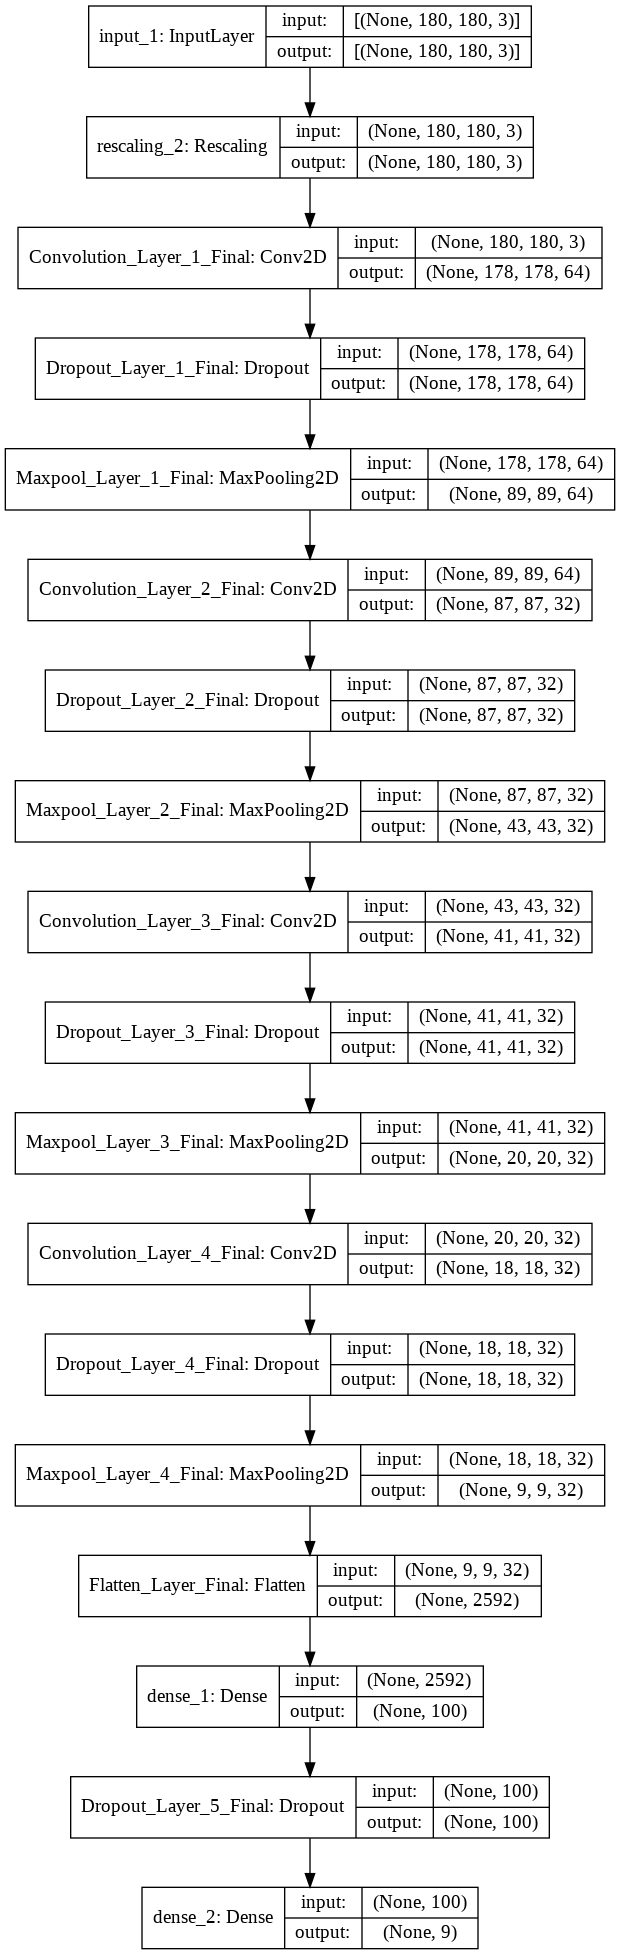

In [62]:
tf.keras.utils.plot_model(
    model_final, to_file='model_3.png', show_shapes=True, show_layer_names=True,
    rankdir='TB')

#### **Todo:**  Train your model

In [84]:
epochs = 30
## Your code goes here, use 50 epochs.
history_final = model_final.fit(
  final_train_data_gen,
  validation_data=final_val_data_gen,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 71s 418ms/step - loss: 2.1414 - accuracy: 0.1701 - val_loss: 1.7526 - val_accuracy: 0.3929
Epoch 2/30
169/169 [==============================] - 70s 416ms/step - loss: 1.6470 - accuracy: 0.3806 - val_loss: 1.6713 - val_accuracy: 0.4159
Epoch 3/30
169/169 [==============================] - 70s 415ms/step - loss: 1.5000 - accuracy: 0.4244 - val_loss: 1.5468 - val_accuracy: 0.4263
Epoch 4/30
169/169 [==============================] - 70s 413ms/step - loss: 1.4435 - accuracy: 0.4512 - val_loss: 1.5022 - val_accuracy: 0.4308
Epoch 5/30
169/169 [==============================] - 70s 414ms/step - loss: 1.3629 - accuracy: 0.4823 - val_loss: 1.4550 - val_accuracy: 0.4509
Epoch 6/30
169/169 [==============================] - 70s 416ms/step - loss: 1.2269 - accuracy: 0.5376 - val_loss: 1.2759 - val_accuracy: 0.5060
Epoch 7/30
169/169 [==============================] - 70s 416ms/step - loss: 1.1349 - accuracy: 0.5638 - val_loss: 1.2103 - val_ac

#### **Todo:**  Visualize the model results

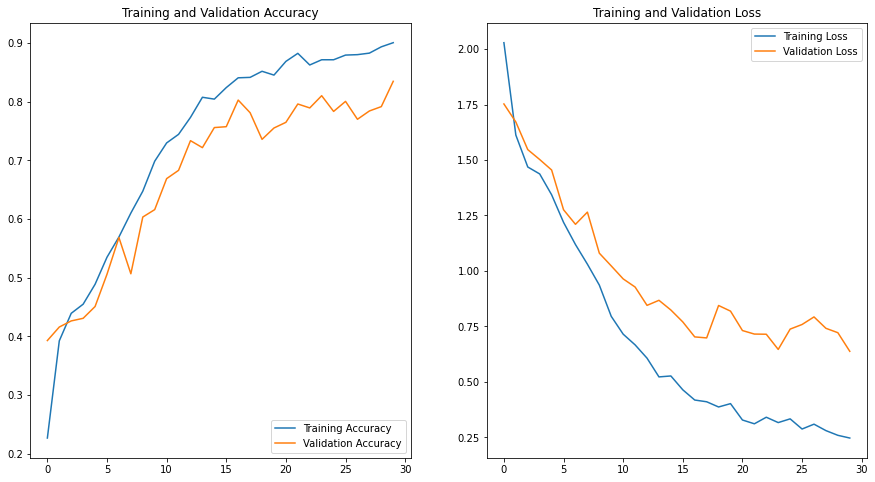

In [86]:
acc = history_final.history['accuracy']
val_acc = history_final.history['val_accuracy']

loss = history_final.history['loss']
val_loss = history_final.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



## **Understandings on the model fit:**
From the model results and the train and test graphs above we could clearly see that after training the model for ~30 epochs on the final dataset after rebalacing the classes, the training accuracy is **90.30%** and the validation accuracy is **83.48%**.
The model is giving quite a good validation accuracy with respect to the previous two models and is also least overfitted among the three models that we have created. Though we have not got a perfectly fitted model but we were able to reduce the overfitting to quite a large extent.
So we could conclude that the class rebalance have helped in increasing the generalization of the model as the overfitting was reduced a lot and also it was giving reasonably good validation accuracy.

## Summary
##### **1. There were total 2357 images in the original Train folder. Out of those we took 80% of the data as train data and 20% as validation data.**<br>
##### **2. We have also visualized the iamges of the 9 different classes.**<br>
##### **3. We have trained a vanilla model on the dataset and found that the train accuracy as and validation accuracy as 76.35 and 40.32. Thus the vanilla model was ovefiiting to a very large extent**<br>
##### **4. Then we have used the data segmentation technique on the data and then visualized a single instance of the image.**<br>
##### **5. Then we have transformed the original dataset using the augmentaion technique and also trained the model using this dataset. We found that the train accuracy as and validation accuracy as . Even though the difference between the train and the validation accuracy was high but was comparatively less as compared to the vanilla model. We were able to reduce the overfitting as compared to the vanilla model**<br>
##### **6. Then we have analysed the distribution of the different classes on the original train data. We found that the seborrheic keratosis class have least amount of data(77 images/3.439035%) and the pigmented benign keratosis class was having the highest count (462 images/20.634212%)**<br>
##### **7. Since the dataset was bit imbalanced we tried to balance the data by using the Augmentor class and created 500 samples of each class**
##### **8. Now we have 4500 additional images which we added with the original 2357 images and did 80-20 split for train and validation**
##### **9. Finally we trained the model on the final dataset discussed in point 8. The training accuracy of the model was 90.30% and the validation accuracy of the model was 83.48%**
##### **10. The final model that was trained using the original+created dataset had a quite good validation accuracy of 83.48% and also the model was marginally less overfitted.**